In [1]:
# =========================
#
# Titel : HPC Game Of Life
# Author: Dimitri Dening
# Date  : 29.06.2021
#
# =========================

from IPython.display import display
import matplotlib.pyplot as plt
import contextlib
import pandas as pd
import numpy as np
import json
import csv
import os

#### Serielle Daten sammeln

In [2]:
data_dir = '../rawdata/seriell/'
data_sets = [folder.path for folder in os.scandir(data_dir) if folder.is_dir()]

s_exists = False

for index, data_set in enumerate(data_sets):
          
    try:
        file_dir_ser = data_set + '/seriell_data.csv'
        file_dir_opt = data_set + '/optmzd_data.csv'
        
        data_seriell = pd.read_csv(file_dir_ser, names=('method', 'threads', 'frames', 'ssize', 't_mean', 't_std'))
        data_optmzd = pd.read_csv(file_dir_opt, names=('method', 'threads', 'frames', 'ssize', 't_mean', 't_std'))
        s_exists = True 
        
        # display(data_seriell)
        # display(data_optmzd)
     
    except:
        pass # Daten existieren nicht   

#### Parallel Referenz Daten sammeln

In [3]:
data_dir = '../rawdata/parallel-reference/'
data_sets = [folder.path for folder in os.scandir(data_dir) if folder.is_dir()]

prl_ref_data = []

for index, data_set in enumerate(data_sets):
          
    try:
        file_dir_prl_ref = data_set + '/prl_ref_data.csv'     
        prl_ref_data.append(pd.read_csv(file_dir_prl_ref, names=('method', 'threads', 'frames', 'ssize', 't_mean', 't_std')))
        # display(prl_ref_data[-1])
    except:
        pass # Daten existieren nicht

#### Distributed Daten sammeln

In [4]:
data_dir = '../rawdata/distributed-memory/'
data_sets = [folder.path for folder in os.scandir(data_dir) if folder.is_dir()]

dstrb_data = []

for index, data_set in enumerate(data_sets):
          
    try:
        file_dir_dstrb = data_set + '/dstrb_data.csv'     
        dstrb_data.append(pd.read_csv(file_dir_dstrb, names=('method', 'threads', 'frames', 'ssize', 't_mean', 't_std')))
        # display(dstrb_data[-1])
    except:
        pass # Daten existieren nicht

#### Shared Daten sammeln

In [5]:
data_dir = '../rawdata/shared-memory/'
data_sets = [folder.path for folder in os.scandir(data_dir) if folder.is_dir()]

shrd_data = []

for index, data_set in enumerate(data_sets):
          
    try:
        file_dir_shrd = data_set + '/shrd_data.csv'     
        shrd_data.append(pd.read_csv(file_dir_shrd, names=('method', 'threads', 'frames', 'ssize', 't_mean', 't_std')))
        # display(shrd_data[-1])
    except:
        pass # Daten existieren nicht

#### Multi-Node Daten sammeln

In [6]:
data_dir = '../rawdata/multi-node/'
data_sets = [folder.path for folder in os.scandir(data_dir) if folder.is_dir()]

mn_data = []

for index, data_set in enumerate(data_sets):
          
    try:
        file_dir_mn = data_set + '/multi-node_data.csv'     
        mn_data.append(pd.read_csv(file_dir_mn, names=('method', 'threads', 'frames', 'ssize', 't_mean', 't_std')))
        # display(mn_data[-1])
    except:
        pass # Daten existieren nicht

#### Speedup Parallel-Reference in Bezug auf seriellen Code

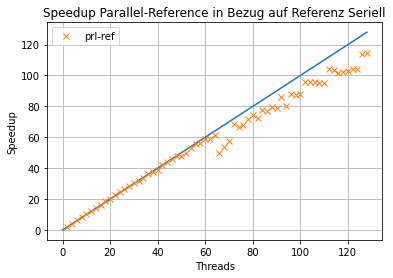

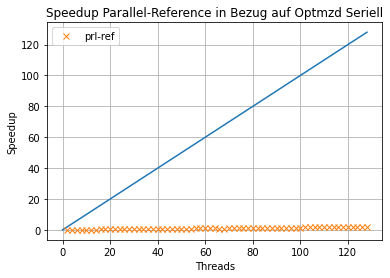

In [38]:
if s_exists:
    seriell = pd.DataFrame(data_seriell, columns=['ssize', 't_mean']) 
    optmzd = pd.DataFrame(data_optmzd, columns=['ssize', 't_mean']) 
    
    # ===== In Bezug auf Referenz =======
    
    sub_data_prl_ref = []
    thread = 128
    
    for _data in prl_ref_data:
        sub_data_prl_ref.append(pd.DataFrame(_data, columns=['threads', 'ssize', 't_mean', 't_std', 'method']))
        # display(sub_data)
        
    plt.plot(np.arange(thread + 1), np.arange(thread + 1))
    
    for sd in sub_data_prl_ref:
        
        sd['t_mean'] = seriell[seriell.ssize == 1000]['t_mean'].values[0]/sd['t_mean']
        plt.plot(sd['threads'][0:thread//2], sd['t_mean'][0:thread//2], "x", label=sd['method'][0])
        # plt.errorbar(sd['threads'], sd['t_mean'], yerr=sd['t_std'], fmt=' ', color='red', ecolor='grey', elinewidth=1, capsize=5)
        # sd.plot(x='threads', y='t_mean', kind='scatter', grid=True)

    plt.legend(loc="best")
    plt.title("Speedup Parallel-Reference in Bezug auf Referenz Seriell")
    plt.xlabel("Threads")
    plt.ylabel("Speedup")
    plt.grid()
    plt.savefig('speedup-prl-ref-vs-ref.png', bbox_inches='tight')
    plt.show()
    
    # ===== In Bezug auf Optmzd =======
    
    sub_data_prl_ref = []
    thread = 128
    
    for _data in prl_ref_data:
        sub_data_prl_ref.append(pd.DataFrame(_data, columns=['threads', 'ssize', 't_mean', 't_std', 'method']))
        # display(sub_data)
        
    plt.plot(np.arange(thread + 1), np.arange(thread + 1))
    
    for sd in sub_data_prl_ref:
        
        sd['t_mean'] = optmzd[optmzd.ssize == 1000]['t_mean'].values[0]/sd['t_mean']
        plt.plot(sd['threads'][0:thread//2], sd['t_mean'][0:thread//2], "x", label=sd['method'][0])
        
    plt.legend(loc="best")
    plt.title("Speedup Parallel-Reference in Bezug auf Optmzd Seriell")
    plt.xlabel("Threads")
    plt.ylabel("Speedup")
    plt.grid()
    plt.show()

#### Speedup Distributed in Bezug auf seriellen Code

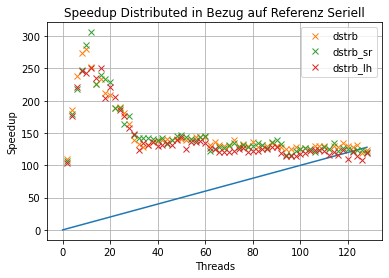

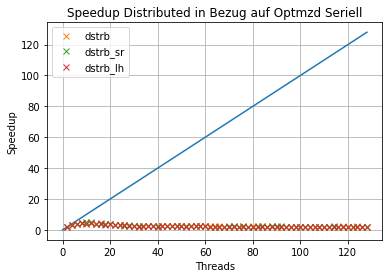

In [43]:
if s_exists:
    seriell = pd.DataFrame(data_seriell, columns=['ssize', 't_mean']) 
    optmzd = pd.DataFrame(data_optmzd, columns=['ssize', 't_mean']) 
    
    # ===== In Bezug auf Referenz =======
    
    sub_data_dstrb = []
    thread = 128
    
    for _data in dstrb_data:
        sub_data_dstrb.append(pd.DataFrame(_data, columns=['threads', 'ssize', 't_mean', 't_std', 'method']))
        # display(sub_data)
        
    plt.plot(np.arange(thread + 1), np.arange(thread + 1))
    
    for sd in sub_data_dstrb:
        
        sd['t_mean'] = seriell[seriell.ssize == 1000]['t_mean'].values[0]/sd['t_mean']
        plt.plot(sd['threads'][0:thread//2], sd['t_mean'][0:thread//2], "x", label=sd['method'][0])
        # plt.errorbar(sd['threads'], sd['t_mean'], yerr=sd['t_std'], fmt=' ', color='red', ecolor='grey', elinewidth=1, capsize=5)
        # sd.plot(x='threads', y='t_mean', kind='scatter', grid=True)

    plt.legend(loc="best")
    plt.title("Speedup Distributed in Bezug auf Referenz Seriell")
    plt.xlabel("Threads")
    plt.ylabel("Speedup")
    plt.grid()
    plt.savefig('speedup-dstrb-vs-ref.png', bbox_inches='tight')
    plt.show()
    
    # ===== In Bezug auf Optmzd =======
    
    sub_data_dstrb = []
    thread = 128
    
    for _data in dstrb_data:
        sub_data_dstrb.append(pd.DataFrame(_data, columns=['threads', 'ssize', 't_mean', 't_std', 'method']))
        # display(sub_data)
        
    plt.plot(np.arange(thread + 1), np.arange(thread + 1))
    
    for sd in sub_data_dstrb:
        
        sd['t_mean'] = optmzd[optmzd.ssize == 1000]['t_mean'].values[0]/sd['t_mean']
        plt.plot(sd['threads'][0:thread//2], sd['t_mean'][0:thread//2], "x", label=sd['method'][0])
        
    plt.legend(loc="best")
    plt.title("Speedup Distributed in Bezug auf Optmzd Seriell")
    plt.xlabel("Threads")
    plt.ylabel("Speedup")
    plt.grid()
    plt.savefig('speedup-dstrb-vs-optmzd.png', bbox_inches='tight')
    plt.show()

#### Speedup Shared in Bezug auf seriellen Code

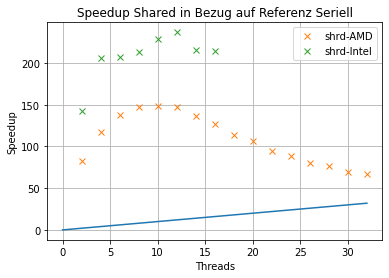

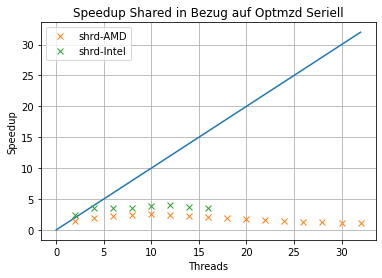

In [42]:
if s_exists:
    seriell = pd.DataFrame(data_seriell, columns=['ssize', 't_mean']) 
    optmzd = pd.DataFrame(data_optmzd, columns=['ssize', 't_mean']) 
    
    # ===== In Bezug auf Referenz =======
    
    sub_data_shrd = []
    thread = 32
    label = ["AMD", "Intel"]
    
    for _data in shrd_data:
        sub_data_shrd.append(pd.DataFrame(_data, columns=['threads', 'ssize', 't_mean', 't_std', 'method']))
        # display(sub_data)
        
    plt.plot(np.arange(thread + 1), np.arange(thread + 1))
    
    for index, sd in enumerate(sub_data_shrd):
        
        sd['t_mean'] = seriell[seriell.ssize == 1000]['t_mean'].values[0]/sd['t_mean']
        plt.plot(sd['threads'][0:thread//2], sd['t_mean'][0:thread//2], "x", label=sd['method'][0] + "-" + label[index])
        # plt.errorbar(sd['threads'], sd['t_mean'], yerr=sd['t_std'], fmt=' ', color='red', ecolor='grey', elinewidth=1, capsize=5)
        # sd.plot(x='threads', y='t_mean', kind='scatter', grid=True)

    plt.legend(loc="best")
    plt.title("Speedup Shared in Bezug auf Referenz Seriell")
    plt.xlabel("Threads")
    plt.ylabel("Speedup")
    plt.grid()
    plt.savefig('speedup-shrd-vs-ref.png', bbox_inches='tight')
    plt.show()
    
    # ===== In Bezug auf Optmzd =======
    
    sub_data_shrd = []
    thread = 32
    
    for _data in shrd_data:
        sub_data_shrd.append(pd.DataFrame(_data, columns=['threads', 'ssize', 't_mean', 't_std', 'method']))
        # display(sub_data)
        
    plt.plot(np.arange(thread + 1), np.arange(thread + 1))
    
    for index, sd in enumerate(sub_data_shrd):
        
        sd['t_mean'] = optmzd[optmzd.ssize == 1000]['t_mean'].values[0]/sd['t_mean']
        plt.plot(sd['threads'][0:thread//2], sd['t_mean'][0:thread//2], "x", label=sd['method'][0] + "-" + label[index])
        
    plt.legend(loc="best")
    plt.title("Speedup Shared in Bezug auf Optmzd Seriell")
    plt.xlabel("Threads")
    plt.ylabel("Speedup")
    plt.grid()
    plt.savefig('speedup-shrd-vs-optmzd.png', bbox_inches='tight')
    plt.show()

#### Speedup Multi-Node in Bezug auf seriellen Code

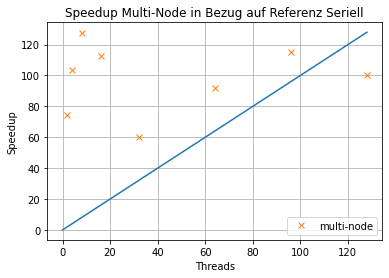

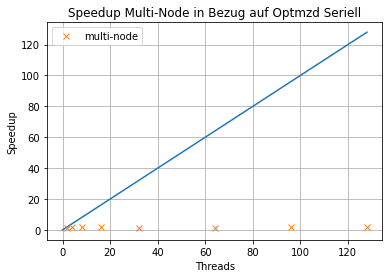

In [44]:
if s_exists:
    seriell = pd.DataFrame(data_seriell, columns=['ssize', 't_mean']) 
    optmzd = pd.DataFrame(data_optmzd, columns=['ssize', 't_mean']) 
    
    # ===== In Bezug auf Referenz =======
    
    sub_data_mn = []
    thread = 128
    
    for _data in mn_data:
        sub_data_mn.append(pd.DataFrame(_data, columns=['threads', 'ssize', 't_mean', 't_std', 'method']))
        # display(sub_data)
        
    plt.plot(np.arange(thread + 1), np.arange(thread + 1))
    
    for index, sd in enumerate(sub_data_mn):
        
        sd['t_mean'] = seriell[seriell.ssize == 1000]['t_mean'].values[0]/sd['t_mean']
        plt.plot(sd['threads'][0:thread//2], sd['t_mean'][0:thread//2], "x", label=sd['method'][0])
        # plt.errorbar(sd['threads'], sd['t_mean'], yerr=sd['t_std'], fmt=' ', color='red', ecolor='grey', elinewidth=1, capsize=5)
        # sd.plot(x='threads', y='t_mean', kind='scatter', grid=True)

    plt.legend(loc="best")
    plt.title("Speedup Multi-Node in Bezug auf Referenz Seriell")
    plt.xlabel("Threads")
    plt.ylabel("Speedup")
    plt.grid()
    plt.savefig('speedup-mn-vs-ref.png', bbox_inches='tight')
    plt.show()
    
    # ===== In Bezug auf Optmzd =======
    
    sub_data_mn = []
    thread = 128
    
    for _data in mn_data:
        sub_data_mn.append(pd.DataFrame(_data, columns=['threads', 'ssize', 't_mean', 't_std', 'method']))
        # display(sub_data)
        
    plt.plot(np.arange(thread + 1), np.arange(thread + 1))
    
    for index, sd in enumerate(sub_data_mn):
        
        sd['t_mean'] = optmzd[optmzd.ssize == 1000]['t_mean'].values[0]/sd['t_mean']
        plt.plot(sd['threads'][0:thread//2], sd['t_mean'][0:thread//2], "x", label=sd['method'][0])
        
    plt.legend(loc="best")
    plt.title("Speedup Multi-Node in Bezug auf Optmzd Seriell")
    plt.xlabel("Threads")
    plt.ylabel("Speedup")
    plt.grid()
    plt.savefig('speedup-mn-vs-optmzd.png', bbox_inches='tight')
    plt.show()

#### Speedup (Gesamt) in Bezug auf seriellen Code

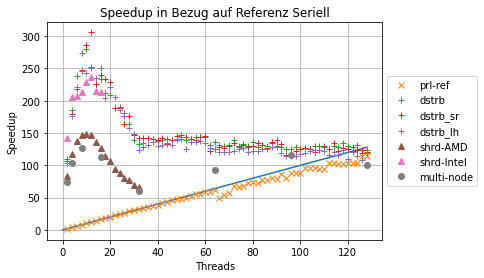

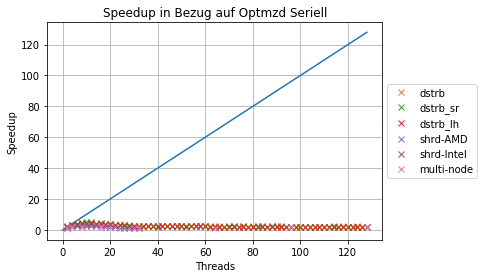

In [8]:
if s_exists:
    seriell = pd.DataFrame(data_seriell, columns=['ssize', 't_mean']) 
    optmzd = pd.DataFrame(data_optmzd, columns=['ssize', 't_mean']) 
    label = ["AMD", "Intel"]
    
    # ===== In Bezug auf Referenz =======
    thread = 128
    
    sub_data_prl_ref = []
    sub_data_shrd    = []
    sub_data_dstrb   = []
    sub_data_mn      = []
    
    for _data in prl_ref_data:
        sub_data_prl_ref.append(pd.DataFrame(_data, columns=['threads', 'ssize', 't_mean', 't_std', 'method']))
        # display(sub_data_prl_ref)
        
    for _data in shrd_data:
        sub_data_shrd.append(pd.DataFrame(_data, columns=['threads', 'ssize', 't_mean', 't_std', 'method']))
        # display(sub_data_shrd)
        
    for _data in dstrb_data:
        sub_data_dstrb.append(pd.DataFrame(_data, columns=['threads', 'ssize', 't_mean', 't_std', 'method']))
        # display(sub_data_dstrb)
        
    for _data in mn_data:
        sub_data_mn.append(pd.DataFrame(_data, columns=['threads', 'ssize', 't_mean', 't_std', 'method']))
        # display(sub_data_mn)
    
    plt.plot(np.arange(thread + 1), np.arange(thread + 1))
    
    for R in sub_data_prl_ref:
        R['t_mean'] = seriell[seriell.ssize == 1000]['t_mean'].values[0]/R['t_mean']
        plt.plot(R['threads'][0:thread//2], R['t_mean'][0:thread//2], "x", label=R['method'][0])
        
    for D in sub_data_dstrb:
        D['t_mean'] = seriell[seriell.ssize == 1000]['t_mean'].values[0]/D['t_mean']
        plt.plot(D['threads'][0:thread//2], D['t_mean'][0:thread//2], "+", label=D['method'][0])
       
    for index, S in enumerate(sub_data_shrd):
        S['t_mean'] = seriell[seriell.ssize == 1000]['t_mean'].values[0]/S['t_mean']
        plt.plot(S['threads'][0:thread//2], S['t_mean'][0:thread//2], "^", label=S['method'][0] + "-" + label[index])
        # plt.errorbar(s['threads'], s['t_mean'], yerr=s['t_std'], fmt=' ', color='red', ecolor='grey', elinewidth=1, capsize=5)
        
    for index, M in enumerate(sub_data_mn):
        M['t_mean'] = seriell[seriell.ssize == 1000]['t_mean'].values[0]/M['t_mean']
        plt.plot(M['threads'][0:thread//16], M['t_mean'][0:thread//16], "o", label=M['method'][0])
        # plt.errorbar(s['threads'], s['t_mean'], yerr=s['t_std'], fmt=' ', color='red', ecolor='grey', elinewidth=1, capsize=5)

    # plt.legend(loc="best")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("Speedup in Bezug auf Referenz Seriell")
    plt.xlabel("Threads")
    plt.ylabel("Speedup")
    plt.grid()
    plt.savefig('speedup-all-vs-ref.png', bbox_inches='tight')
    plt.show()
    
    # ===== In Bezug auf Optmzd =======
    thread = 128
    
    sub_data_shrd = []
    sub_data_dstrb = []
    sub_data_mn      = []
    
    for _data in shrd_data:
        sub_data_shrd.append(pd.DataFrame(_data, columns=['threads', 'ssize', 't_mean', 't_std', 'method']))
        # display(sub_data)
        
    for _data in dstrb_data:
        sub_data_dstrb.append(pd.DataFrame(_data, columns=['threads', 'ssize', 't_mean', 't_std', 'method']))
        # display(sub_data)
        
    for _data in mn_data:
        sub_data_mn.append(pd.DataFrame(_data, columns=['threads', 'ssize', 't_mean', 't_std', 'method']))
        # display(sub_data_mn)
    
    plt.plot(np.arange(thread + 1), np.arange(thread + 1))
    
    for D in sub_data_dstrb:
        D['t_mean'] = optmzd[optmzd.ssize == 1000]['t_mean'].values[0]/D['t_mean']
        plt.plot(D['threads'][0:thread//2], D['t_mean'][0:thread//2], "x", label=D['method'][0])
       
    for index, S in enumerate(sub_data_shrd):
        S['t_mean'] = optmzd[optmzd.ssize == 1000]['t_mean'].values[0]/S['t_mean']
        plt.plot(S['threads'][0:thread//2], S['t_mean'][0:thread//2], "x", label=S['method'][0] + "-" + label[index])
        # plt.errorbar(s['threads'], s['t_mean'], yerr=s['t_std'], fmt=' ', color='red', ecolor='grey', elinewidth=1, capsize=5)
        
    for index, M in enumerate(sub_data_mn):
        M['t_mean'] = optmzd[optmzd.ssize == 1000]['t_mean'].values[0]/M['t_mean']
        plt.plot(M['threads'][0:thread//16], M['t_mean'][0:thread//16], "x", label=M['method'][0])
        # plt.errorbar(s['threads'], s['t_mean'], yerr=s['t_std'], fmt=' ', color='red', ecolor='grey', elinewidth=1, capsize=5)

    # plt.legend(loc="best")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("Speedup in Bezug auf Optmzd Seriell")
    plt.xlabel("Threads")
    plt.ylabel("Speedup")
    plt.grid()
    plt.savefig('speedup-all-vs-optmzd.png', bbox_inches='tight')
    plt.show()